# Modelos de Regresion Logistica

La regresion logistica es un algoritmo de clasficacion binaria dado que la funcion sigmoide clasifica  la probabilidad de que algo ocurra 1 o no 0, segun las dimenciones pasadas al modelo

$ P(Y = 1 \mid X) = \sigma(z) = \frac{1}{1 + e^{-z}} $


In [1]:
# importacion de recursos
from services.transformaciones import CargaDatos
from config.parametros import RutaDataSet as RT
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Importar la matriz X
X_matriz = CargaDatos('Archivos')
X = X_matriz.leer_matriz_numpy(nombre_matriz=RT.X)
X.shape


(16170, 57)

In [3]:
# Importar la matriz y
y_matriz = CargaDatos('Archivos')
y = y_matriz.leer_matriz_numpy(nombre_matriz=RT.y)
y.shape

(16170,)

In [4]:
# Importar la matriz e que contiene las etiquetas de la matriz
e_matriz = CargaDatos('Archivos')
e = e_matriz.leer_matriz_numpy(nombre_matriz=RT.e)
e.shape

(16170,)

In [5]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test, e_train, e_test = train_test_split(X, y, e, test_size=0.3, random_state=42)
# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8950731807874664
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      4269
         1.0       0.70      0.22      0.33       582

    accuracy                           0.90      4851
   macro avg       0.80      0.60      0.64      4851
weighted avg       0.88      0.90      0.87      4851



# Evaludacion del modelo usando AUC 
(Área Bajo la Curva ROC)

AUC-ROC: 0.7837927309404731


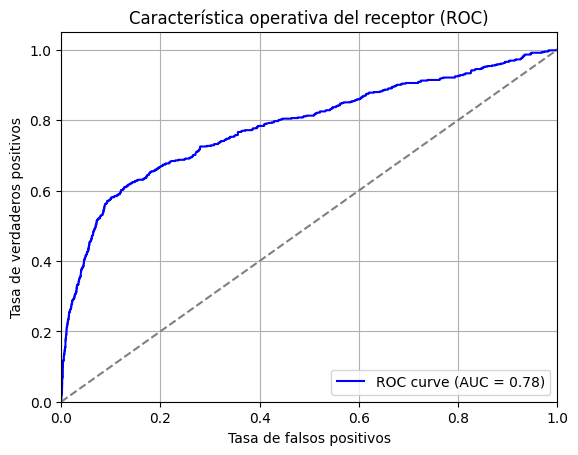

In [6]:
y_prob = model.predict_proba(X_test)[:, 1]
# Calcular AUC
auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc}')
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Característica operativa del receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Generar DataFrame con las salidas

In [10]:
# Hacer predicciones en el conjunto de prueba
y_prob = model.predict(X_test).flatten()

# Crear un DataFrame con los IDs y las probabilidades predichas
resultados = pd.DataFrame({
    'ID': e_test.flatten(),
    'y': y_prob
})
resultados.to_csv(RT.RegresionLogistica,encoding='utf-8',sep=',',index=False)